# SAMPLE SIZE CALCULATOR

In [68]:
import warnings
warnings.filterwarnings("ignore")

import math
import numpy as np
import scipy.stats

import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [69]:
from ipywidgets import widgets
from IPython.display import display
from IPython.display import clear_output

In [70]:
variation1 = True

In [235]:
def run(ctr_a,ratio,effect,power,significance,variation):
    
    ctr_a /= 100.
    ratio /= 100.
    effect /= 100.
    power /= 100.
    significance /= 100.
    
    nd = scipy.stats.norm(0,1)

    z_score = nd.ppf(1-significance)
    inv_power = z_score - nd.ppf(1-power)
    abs_effect = effect*ctr_a
    ctr_b = ctr_a + abs_effect*(z_score/inv_power if variation else 1)
    
    N = inv_power**2/abs_effect**2*(ctr_b*(1-ctr_b)/ratio+ctr_a*(1-ctr_a)/(1-ratio))
    
    fig = plt.figure(figsize=(20,10))

    var_a = ctr_a*(1-ctr_a)/(N*(1-ratio))
    var_b = ctr_b*(1-ctr_b)/(N*ratio)
    var = var_a + var_b
    std = math.sqrt(var)
    std5 = 5*std

    scaled_z_score = scipy.stats.norm(0,std).ppf(1.-significance)

    nd = scipy.stats.norm(0,std)
    x = np.linspace(-std5,std5,1000)
    y = nd.pdf(x)
    plt.plot(x,y,color='red')
    section1 = x[x>=scaled_z_score]
    y_section1 = nd.pdf(section1)
    fill1 = plt.fill_between(section1,y_section1,color=(.9,.0,.0,.3))

    nd2 = scipy.stats.norm(abs_effect,std)
    x = np.linspace(abs_effect-std5,abs_effect+std5,1000)
    y = nd2.pdf(x)
    plt.plot(x,y)
    section2 = x[x<=scaled_z_score]
    y_section2 = nd2.pdf(section2)
    fill2 = plt.fill_between(section2,y_section2,color=(.0,.0,.9,.3))
    plt.vlines(abs_effect,0,y.max(),color='b',linestyle='dashed')
    text = plt.text(abs_effect,0,'effect',horizontalalignment='right',verticalalignment='bottom',fontsize=12,rotation=90,color='b')
    title = plt.title('Required Sample Size is {:,.0f}'.format(N),fontsize=15)

In [236]:
slider_ctr_a = widgets.IntSlider(10,continuous_update=False, description='Original CTR -------',max=100,width=800)
slider_ratio = widgets.IntSlider(50,continuous_update=False, description='B to A Ratio --------',max=100,width=800)
slider_effect = widgets.IntSlider(10,continuous_update=False, description='Relative Effect -----',max=100,width=800)
slider_power = widgets.IntSlider(80,continuous_update=False, description='Power (1 - beta) ---',min=50,max=100,width=800)
slider_significance = widgets.FloatSlider(5,continuous_update=False, description='Significance (alpha)',min=0,max=50,step=0.5,width=800)
checkbox_variation = widgets.Checkbox(False,description="Use Implied CTR")

Select percentage values

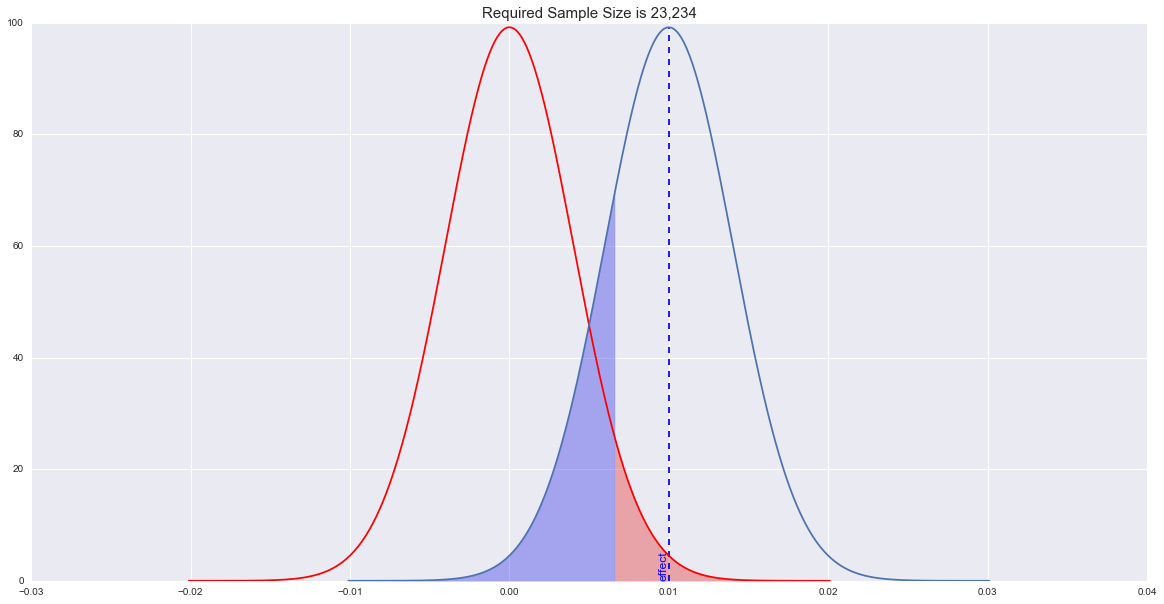

In [237]:
w=widgets.interactive(
    run,
    ctr_a=slider_ctr_a,
    ratio=slider_ratio,
    effect=slider_effect,
    power=slider_power,
    significance=slider_significance,
    variation = checkbox_variation)
display(w)

# AB TEST

In [251]:
def run_ab_test(impr_a,impr_b,clicks_a,clicks_b,significance):
    significance /= 100.
    
    ctr_a = clicks_a/float(impr_a)
    ctr_b = clicks_b/float(impr_b)

    var_a = ctr_a*(1-ctr_a)/impr_a
    var_b = ctr_b*(1-ctr_b)/impr_b

    z_score = (ctr_b - ctr_a)/math.sqrt(var_a + var_b)

    z_threshold = scipy.stats.norm(0,1).ppf(1-significance)
    
    nd = scipy.stats.norm(0,1)
    x = np.linspace(-5,5,1000)
    y = nd.pdf(x)
    fig = plt.figure(figsize=(20,10))
    plt.plot(x,y,color='red')
    section1 = x[x>=z_threshold]
    y_section1 = nd.pdf(section1)
    fill1 = plt.fill_between(section1,y_section1,color=(.9,.0,.0,.3))
    plt.vlines(z_score,0,y.max(),color='r',linestyle='dashed')
    text = plt.text(z_score,0,'Observed Z-Score',horizontalalignment='right',verticalalignment='bottom',fontsize=12,rotation=90,color='r')
    title = plt.title('Z-Score Distribution assuming B=A',fontsize=15)
    
    p_val = 1-nd.cdf(z_score)
    if z_score>=z_threshold:
        message = "Test is statistically significant \n\n p-value = {:.2f} >= {} =  $\\alpha$".format(p_val,significance)
        text = plt.text(-4,0.33,message,horizontalalignment='center',verticalalignment='top',fontsize=16,color='b')
    else:
        message = "Test is not statistically significant \n\n p-value = {:.2f} < {} =  $\\alpha$".format(p_val,significance)
        text = plt.text(-4,0.34,message,horizontalalignment='center',verticalalignment='top',fontsize=16,color='r')

In [252]:
text_impr_a = widgets.IntText(1000,description='Impressions A')
text_impr_b = widgets.IntText(1000,description='Impressions B')
text_clicks_a = widgets.IntText(100,description='Clicks A')
text_clicks_b = widgets.IntText(120,description='Clicks B')
slider_significance = widgets.FloatSlider(5,continuous_update=False, description='Significance (alpha)',min=0,max=50,step=0.5,width=800)

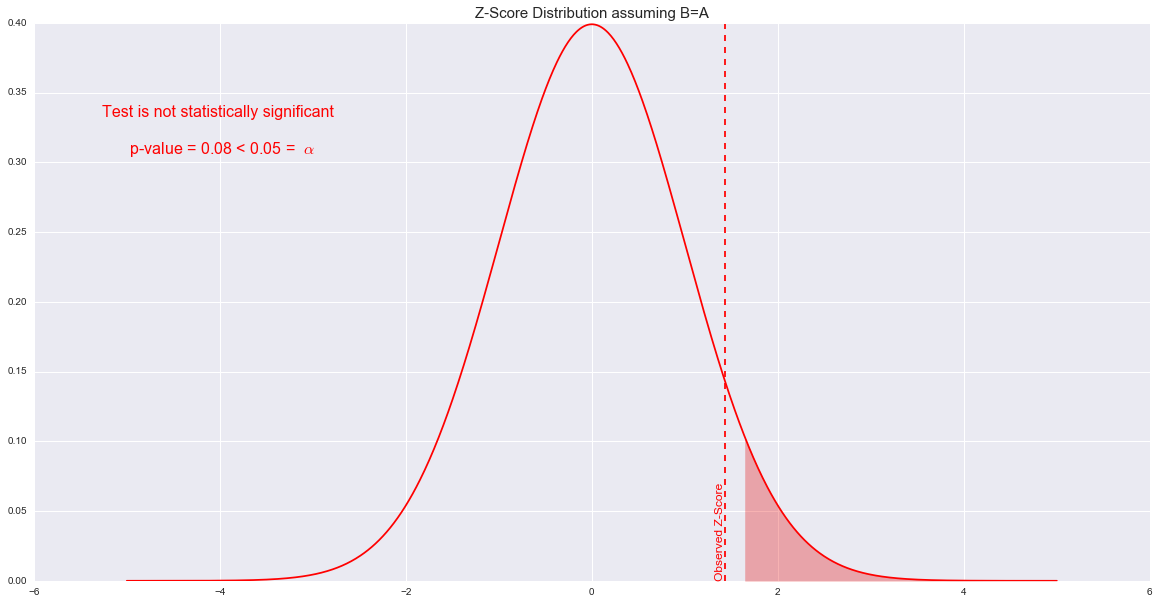

In [253]:
w=widgets.interactive(
    run_ab_test,
    impr_a=text_impr_a,
    impr_b=text_impr_b,
    clicks_a=text_clicks_a,
    clicks_b=text_clicks_b,
    significance=slider_significance)
display(w)

# References

https://vwo.com/blog/how-to-calculate-ab-test-sample-size/

In [254]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')